# 단층 퍼센트론 구현하기

In [ ]:
### 파이토치로 단층 퍼셉트론 구현하기  (xor 게이트)

import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)  ## cpu/gpu에 모델링
# to() 함수는 연산을 어디서 수행할지를 정합니다. 
# to() 함수는 모델의 매개변수를 지정한 장치의 메모리로 보냅니다. 
# CPU를 사용할 경우에는 필요가 없지만, GPU를 사용하려면 to('cuda')를 해 줄 필요가 있습니다. 
# 아무것도 지정하지 않은 경우에는 CPU 연산이라고 보면 됩니다.

In [ ]:
# 비용 함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device)  # nn.BCELoss()는 이진 분류에서 사용하는 크로스엔트로피 함수
optimizer = torch.optim.SGD(model.parameters(), lr=1)



In [ ]:
#10,001번의 에포크 수행. 0번 에포크부터 10,000번 에포크까지.
for step in range(10001): 
    
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if step % 100 == 0: # 100번째 에포크마다 비용 출력
        print(step, cost.item())   ## 단층 퍼셉트론이므로 XOR 추론을 하지 못함 (성능 개선 안됨)

0 0.7273974418640137
100 0.6931476593017578
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [ ]:
# https://coffeedjimmy.github.io/pytorch/2019/11/05/pytorch_nograd_vs_train_eval/

# with torch.no_grad()   vs    model.eval()
# with torch.no_grad() : auto gradeint 중단을 통한 메모리 절감      
#  model.eval() : model을 inference 모드로 변경해줌 (training 모드와 infer 모드가 다를때, batchnorm 처럼) 


with torch.no_grad():  ## grad 계산 중단 (단순히 출력해서 내가 보기 위함이므로)
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


In [ ]:
### 파이토치로 다층 퍼셉트론 구현하기




import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'


# for reproducibility (난수 일관화)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    

# 데이터 선언
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
# 다층 퍼셉트론 모델 생성

model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)


In [ ]:
# 손실함수와 옵티마이저 설정

criterion = torch.nn.BCELoss().to(device)   ## 바이너리 크로스 엔드로피 함수
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)  # modified learning rate from 0.1 to 1

In [ ]:
# 백프로파게이션

for epoch in range(20001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())


0 0.6948983669281006
100 0.6931570172309875
200 0.693155825138092
300 0.6931546926498413
400 0.6931535601615906
500 0.6931524276733398
600 0.6931513547897339
700 0.6931504011154175
800 0.6931493282318115
900 0.6931483149528503
1000 0.6931473016738892
1100 0.6931464076042175
1200 0.6931453943252563
1300 0.6931445002555847
1400 0.6931435465812683
1500 0.6931425929069519
1600 0.6931416988372803
1700 0.6931406855583191
1800 0.6931397914886475
1900 0.6931388974189758
2000 0.6931380033493042
2100 0.6931371092796326
2200 0.6931361556053162
2300 0.6931352615356445
2400 0.6931343078613281
2500 0.6931333541870117
2600 0.6931324005126953
2700 0.6931314468383789
2800 0.6931304931640625
2900 0.6931294798851013
3000 0.6931284666061401
3100 0.693127453327179
3200 0.6931264400482178
3300 0.6931253671646118
3400 0.6931242942810059
3500 0.6931232213973999
3600 0.6931220293045044
3700 0.6931208968162537
3800 0.6931196451187134
3900 0.6931184530258179
4000 0.6931172609329224
4100 0.6931158900260925
4200 0

In [ ]:
# 모델 학습 상태 확인

with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[4.941275e-05]
 [9.999273e-01]
 [9.999325e-01]
 [8.212143e-05]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


### 활성화 함수

시그모이드 함수(Sigmoid function)  : 기울기 소실큼, non-centered

하이퍼볼릭탄젠트 함수(Hyperbolic tangent function) : 기울기 소실큼(sigmoid 보다는 낫다), zero-centered

렐루 함수(ReLU) : 기울기 소실 적음, 입력값이 음수면 기울기도 0이 됨 => 죽은 렐루(dying ReLU) 발생

리키 렐루(Leaky ReLU) : 음수일때 0이 아니라 ax로 변경 (a는 leaky parameter, ex) a=0.001) 


In [ ]:
### 다층 퍼셉트론으로 손글씨 분류하기


%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립

from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [ ]:
print(digits.images[0])  ## 에상으로 0임을 알수 있음

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
### DataFrame과 Numpy-array 전체 print 보여주게하는 옵션
import sys
import numpy as np

np.set_printoptions(threshold=sys.maxsize)

print(type(digits))
print(digits)

<class 'sklearn.utils.Bunch'>
{'data': array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9

In [ ]:
print(len(digits.data))
print(digits.data)

1797
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0

In [ ]:
print(len(digits.target))
print(digits.target)

1797
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 3 1 3 9 1
 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 5 4 8 8 4 9 0 8 9 8 0 1 2
 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9
 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8
 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2
 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 3 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0
 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2
 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7
 6 8 4 3 1 4 0 5 3 6

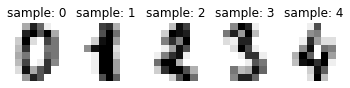

In [ ]:
# 이미지 시각화 해보기

images_and_labels = list(zip(digits.images, digits.target))


for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(1, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

[(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
         [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
         [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
         [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
         [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
         [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
         [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
         [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
  0),
 (array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
         [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
         [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]),
  1),
 (array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
         [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
         [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
         [ 0., 

In [ ]:
# 전체 코드 (손글씨 분류)

import torch
import torch.nn as nn
from torch import optim

model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10), # hidden_layer3 = 16, output_layer = 10
    nn.ReLU()
)


X = torch.tensor(digits.data, dtype=torch.float32)
Y = torch.tensor(digits.target, dtype=torch.int64)


loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.
# 소프트맥스 회귀를 배울 때는 torch.nn.functional.cross_entropy()를 사용하였으나 
# 여기서는 torch.nn.CrossEntropyLoss()을 사용하고 있다. 
# 둘 다 파이토치에서 제공하는 크로스 엔트로피 함수로 둘 다 소프트맥스 함수를 포함하고 있다.

optimizer = optim.Adam(model.parameters())  ## Adam으로 옵티마이저 설정

losses = []

for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, 100, loss.item()
            ))

        losses.append(loss.item())

        
# 최종스코어 : Epoch 9990/100 Cost: 0.237050

Epoch    0/100 Cost: 2.380348
Epoch   10/100 Cost: 2.172263
Epoch   20/100 Cost: 1.897851
Epoch   30/100 Cost: 1.538030
Epoch   40/100 Cost: 1.161730
Epoch   50/100 Cost: 0.880157
Epoch   60/100 Cost: 0.699739
Epoch   70/100 Cost: 0.588389
Epoch   80/100 Cost: 0.515798
Epoch   90/100 Cost: 0.466116
Epoch  100/100 Cost: 0.429698
Epoch  110/100 Cost: 0.401626
Epoch  120/100 Cost: 0.379321
Epoch  130/100 Cost: 0.361328
Epoch  140/100 Cost: 0.346236
Epoch  150/100 Cost: 0.332966
Epoch  160/100 Cost: 0.321967
Epoch  170/100 Cost: 0.312521
Epoch  180/100 Cost: 0.304368
Epoch  190/100 Cost: 0.297320
Epoch  200/100 Cost: 0.291164
Epoch  210/100 Cost: 0.285806
Epoch  220/100 Cost: 0.281124
Epoch  230/100 Cost: 0.277000
Epoch  240/100 Cost: 0.273353
Epoch  250/100 Cost: 0.270104
Epoch  260/100 Cost: 0.267166
Epoch  270/100 Cost: 0.264532
Epoch  280/100 Cost: 0.262168
Epoch  290/100 Cost: 0.260018
Epoch  300/100 Cost: 0.258074
Epoch  310/100 Cost: 0.256305
Epoch  320/100 Cost: 0.254731
Epoch  330

Epoch 2750/100 Cost: 0.237122
Epoch 2760/100 Cost: 0.237121
Epoch 2770/100 Cost: 0.237120
Epoch 2780/100 Cost: 0.237119
Epoch 2790/100 Cost: 0.237120
Epoch 2800/100 Cost: 0.237118
Epoch 2810/100 Cost: 0.237119
Epoch 2820/100 Cost: 0.237116
Epoch 2830/100 Cost: 0.237116
Epoch 2840/100 Cost: 0.237115
Epoch 2850/100 Cost: 0.237114
Epoch 2860/100 Cost: 0.237115
Epoch 2870/100 Cost: 0.237113
Epoch 2880/100 Cost: 0.237112
Epoch 2890/100 Cost: 0.237113
Epoch 2900/100 Cost: 0.237110
Epoch 2910/100 Cost: 0.237110
Epoch 2920/100 Cost: 0.237126
Epoch 2930/100 Cost: 0.237112
Epoch 2940/100 Cost: 0.237111
Epoch 2950/100 Cost: 0.237111
Epoch 2960/100 Cost: 0.237108
Epoch 2970/100 Cost: 0.237108
Epoch 2980/100 Cost: 0.237108
Epoch 2990/100 Cost: 0.237107
Epoch 3000/100 Cost: 0.237107
Epoch 3010/100 Cost: 0.237106
Epoch 3020/100 Cost: 0.237105
Epoch 3030/100 Cost: 0.237106
Epoch 3040/100 Cost: 0.237107
Epoch 3050/100 Cost: 0.237109
Epoch 3060/100 Cost: 0.237107
Epoch 3070/100 Cost: 0.237104
Epoch 3080

Epoch 5490/100 Cost: 0.237061
Epoch 5500/100 Cost: 0.237059
Epoch 5510/100 Cost: 0.237059
Epoch 5520/100 Cost: 0.237058
Epoch 5530/100 Cost: 0.237060
Epoch 5540/100 Cost: 0.237060
Epoch 5550/100 Cost: 0.237059
Epoch 5560/100 Cost: 0.237060
Epoch 5570/100 Cost: 0.237059
Epoch 5580/100 Cost: 0.237059
Epoch 5590/100 Cost: 0.237061
Epoch 5600/100 Cost: 0.237059
Epoch 5610/100 Cost: 0.237058
Epoch 5620/100 Cost: 0.237059
Epoch 5630/100 Cost: 0.237060
Epoch 5640/100 Cost: 0.237059
Epoch 5650/100 Cost: 0.237059
Epoch 5660/100 Cost: 0.237058
Epoch 5670/100 Cost: 0.237058
Epoch 5680/100 Cost: 0.237058
Epoch 5690/100 Cost: 0.237059
Epoch 5700/100 Cost: 0.237061
Epoch 5710/100 Cost: 0.237058
Epoch 5720/100 Cost: 0.237058
Epoch 5730/100 Cost: 0.237058
Epoch 5740/100 Cost: 0.237057
Epoch 5750/100 Cost: 0.237058
Epoch 5760/100 Cost: 0.237059
Epoch 5770/100 Cost: 0.237059
Epoch 5780/100 Cost: 0.237059
Epoch 5790/100 Cost: 0.237058
Epoch 5800/100 Cost: 0.237057
Epoch 5810/100 Cost: 0.237057
Epoch 5820

Epoch 8230/100 Cost: 0.237051
Epoch 8240/100 Cost: 0.237061
Epoch 8250/100 Cost: 0.237053
Epoch 8260/100 Cost: 0.237053
Epoch 8270/100 Cost: 0.237052
Epoch 8280/100 Cost: 0.237052
Epoch 8290/100 Cost: 0.237052
Epoch 8300/100 Cost: 0.237051
Epoch 8310/100 Cost: 0.237051
Epoch 8320/100 Cost: 0.237051
Epoch 8330/100 Cost: 0.237051
Epoch 8340/100 Cost: 0.237051
Epoch 8350/100 Cost: 0.237051
Epoch 8360/100 Cost: 0.237051
Epoch 8370/100 Cost: 0.237051
Epoch 8380/100 Cost: 0.237051
Epoch 8390/100 Cost: 0.237051
Epoch 8400/100 Cost: 0.237051
Epoch 8410/100 Cost: 0.237051
Epoch 8420/100 Cost: 0.237055
Epoch 8430/100 Cost: 0.237059
Epoch 8440/100 Cost: 0.237054
Epoch 8450/100 Cost: 0.237052
Epoch 8460/100 Cost: 0.237052
Epoch 8470/100 Cost: 0.237052
Epoch 8480/100 Cost: 0.237051
Epoch 8490/100 Cost: 0.237051
Epoch 8500/100 Cost: 0.237051
Epoch 8510/100 Cost: 0.237051
Epoch 8520/100 Cost: 0.237051
Epoch 8530/100 Cost: 0.237051
Epoch 8540/100 Cost: 0.237051
Epoch 8550/100 Cost: 0.237051
Epoch 8560

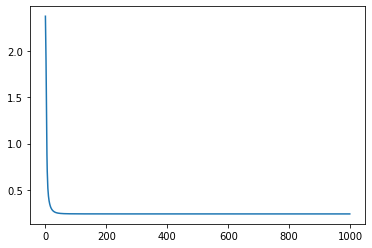

In [ ]:
plt.plot(losses)

In [ ]:
# 모델 확인하기

import torch.nn.functional as F

with torch.no_grad():  ## grad 계산 중단 (단순히 출력해서 내가 보기 위함이므로)
    y_model = model(X)
    y_pred  = torch.argmax(F.softmax(y_model, dim=1), dim =1 )
    accuracy = (y_pred == Y).float().mean()

    print('모델의 예측값(Predicted): ', y_pred.detach().cpu().numpy()[:20])
    print('실제값(Y): ', Y.cpu().numpy()[:20])
    print('정확도(Accuracy): ', accuracy.item())

모델의 예측값(Predicted):  [0 0 2 3 4 5 6 7 8 9 0 0 2 3 4 5 6 7 8 9]
실제값(Y):  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
정확도(Accuracy):  0.8970506191253662


In [ ]:
### MNist 분류하기

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml


# 데이터 다운받기
mnist = fetch_openml('mnist_784', version =1 , cache = True)

mnist.data[0]




array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
x = mnist.data
y = mnist.target.astype(np.int8)   # 원래 object type이었음

y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

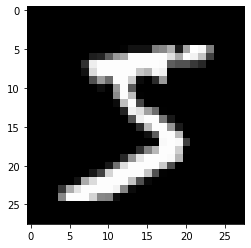

In [ ]:
plt.imshow(x[0].reshape(28,28), cmap = 'gray')

In [ ]:
# 데이터 세팅

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/7, random_state=0)

x_train = torch.Tensor(x_train)
x_test = torch.Tensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(x_train, y_train)   # 데이터 셋으로 묶기
ds_test = TensorDataset(x_test, y_test)      # 데이터 셋으로 묶기

loader_train = DataLoader(ds_train, batch_size = 64, shuffle = True)  # 데이터 로더 만들기 (배치 적용)
loader_test = DataLoader(ds_test, batch_size = 64, shuffle = True)   # 데이터 로더 만들기 (배치 적용)


In [ ]:
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))
model.add_module('relu3', nn.ReLU())

print(model)

# 오차 함수
# loss_fn = nn.CrossEntropyLoss()
# loss_fn = F.cross_entropy()


# 옵티마이저
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)


def train(epoch):
    
    model.train() #  모델을 학습 모드로 전환
    i = epoch
#     for i in range(epoch):

    for data, targets in loader_train:


        optimizer.zero_grad()
        outputs = model(data)
#         print(outputs.shape)
#         print(targets.shape)
        
        cost = F.cross_entropy(outputs, targets)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()


    if i % 2 == 0:
        print("epoch {}/{} : 완료, cost: {} \n".format(i,epoch, cost))
    
    
def test():
    
    model.eval() #  모델을 테스트 모드로 전환
    correct = 0
    
    with torch.no_grad():
        
        for data, targets in loader_test:
            
            outputs = model(data)
            
            _ , predicted = torch.max(outputs.data, dim = 1)
            # torch.argmax도 활용 가능
            
            correct += predicted.eq(targets.data.view_as(predicted)).sum()
            
    data_num = len(loader_test.dataset)
    print(correct, data_num, 100*(correct/data_num))
    
    
    
# y_pred  = torch.argmax(F.softmax(y_model, dim=1), dim =1 )

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
  (relu3): ReLU()
)


In [ ]:
for i in range(50):
    train(i)
    

epoch 0/0 : 완료, cost: 2.3025851249694824 

epoch 2/2 : 완료, cost: 2.3025851249694824 

epoch 4/4 : 완료, cost: 2.3025851249694824 

epoch 6/6 : 완료, cost: 2.3025851249694824 

epoch 8/8 : 완료, cost: 2.3025851249694824 

epoch 10/10 : 완료, cost: 2.3025851249694824 

epoch 12/12 : 완료, cost: 2.3025851249694824 

epoch 14/14 : 완료, cost: 2.3025851249694824 

epoch 16/16 : 완료, cost: 2.3025851249694824 

epoch 18/18 : 완료, cost: 2.3025851249694824 

epoch 20/20 : 완료, cost: 2.3025851249694824 

epoch 22/22 : 완료, cost: 2.3025851249694824 

epoch 24/24 : 완료, cost: 2.3025851249694824 

epoch 26/26 : 완료, cost: 2.3025851249694824 

epoch 28/28 : 완료, cost: 2.3025851249694824 

epoch 30/30 : 완료, cost: 2.3025851249694824 

epoch 32/32 : 완료, cost: 2.3025851249694824 

epoch 34/34 : 완료, cost: 2.3025851249694824 

epoch 36/36 : 완료, cost: 2.3025851249694824 

epoch 38/38 : 완료, cost: 2.3025851249694824 

epoch 40/40 : 완료, cost: 2.3025851249694824 

epoch 42/42 : 완료, cost: 2.3025851249694824 

epoch 44/44 : 완료, co

In [ ]:
for data, targets in loader_train:
    print(loss_fn(model(data), targets))

tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.30

tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.30

tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.30

tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.30

tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.30

# 가중치 규제 적용

In [ ]:
### 과적합 방지

## 가중치 규제 적용해보기


# 전체 코드 (손글씨 분류)

import torch
import torch.nn as nn
from torch import optim

model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10), # hidden_layer3 = 16, output_layer = 10
    nn.ReLU()
)


X = torch.tensor(digits.data, dtype=torch.float32)
Y = torch.tensor(digits.target, dtype=torch.int64)


loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.
# 소프트맥스 회귀를 배울 때는 torch.nn.functional.cross_entropy()를 사용하였으나 
# 여기서는 torch.nn.CrossEntropyLoss()을 사용하고 있다. 
# 둘 다 파이토치에서 제공하는 크로스 엔트로피 함수로 둘 다 소프트맥스 함수를 포함하고 있다.


### 가중치 규제 적용
optimizer = optim.Adam(model.parameters() , lr=1e-4, weight_decay=1e-5)  ## Adam으로 옵티마이저 설정

losses = []

for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, 100, loss.item()
            ))

        losses.append(loss.item())

        
# 최종스코어(가중치 규제 미적용) : Epoch 9990/100 Cost: 0.237050
# 최종스코어(가중치 규제 적용) : Epoch 9990/100 Cost: 0.466502

Epoch    0/100 Cost: 2.441896
Epoch   10/100 Cost: 2.383375
Epoch   20/100 Cost: 2.340715
Epoch   30/100 Cost: 2.307951
Epoch   40/100 Cost: 2.279202
Epoch   50/100 Cost: 2.251271
Epoch   60/100 Cost: 2.223001
Epoch   70/100 Cost: 2.195040
Epoch   80/100 Cost: 2.167903
Epoch   90/100 Cost: 2.141592
Epoch  100/100 Cost: 2.115440
Epoch  110/100 Cost: 2.089322
Epoch  120/100 Cost: 2.063153
Epoch  130/100 Cost: 2.036288
Epoch  140/100 Cost: 2.008533
Epoch  150/100 Cost: 1.979787
Epoch  160/100 Cost: 1.949862
Epoch  170/100 Cost: 1.918050
Epoch  180/100 Cost: 1.884248
Epoch  190/100 Cost: 1.847713
Epoch  200/100 Cost: 1.806986
Epoch  210/100 Cost: 1.760866
Epoch  220/100 Cost: 1.713458
Epoch  230/100 Cost: 1.666883
Epoch  240/100 Cost: 1.620918
Epoch  250/100 Cost: 1.575783
Epoch  260/100 Cost: 1.531682
Epoch  270/100 Cost: 1.488825
Epoch  280/100 Cost: 1.447643
Epoch  290/100 Cost: 1.408380
Epoch  300/100 Cost: 1.371324
Epoch  310/100 Cost: 1.336441
Epoch  320/100 Cost: 1.303910
Epoch  330

Epoch 2800/100 Cost: 0.713011
Epoch 2810/100 Cost: 0.712735
Epoch 2820/100 Cost: 0.712350
Epoch 2830/100 Cost: 0.711861
Epoch 2840/100 Cost: 0.711410
Epoch 2850/100 Cost: 0.711009
Epoch 2860/100 Cost: 0.710652
Epoch 2870/100 Cost: 0.710329
Epoch 2880/100 Cost: 0.710032
Epoch 2890/100 Cost: 0.709754
Epoch 2900/100 Cost: 0.709489
Epoch 2910/100 Cost: 0.709238
Epoch 2920/100 Cost: 0.708998
Epoch 2930/100 Cost: 0.708766
Epoch 2940/100 Cost: 0.708542
Epoch 2950/100 Cost: 0.708326
Epoch 2960/100 Cost: 0.708115
Epoch 2970/100 Cost: 0.707909
Epoch 2980/100 Cost: 0.707709
Epoch 2990/100 Cost: 0.707514
Epoch 3000/100 Cost: 0.707325
Epoch 3010/100 Cost: 0.707139
Epoch 3020/100 Cost: 0.706960
Epoch 3030/100 Cost: 0.706786
Epoch 3040/100 Cost: 0.706612
Epoch 3050/100 Cost: 0.706443
Epoch 3060/100 Cost: 0.706278
Epoch 3070/100 Cost: 0.706115
Epoch 3080/100 Cost: 0.705956
Epoch 3090/100 Cost: 0.705800
Epoch 3100/100 Cost: 0.705647
Epoch 3110/100 Cost: 0.705497
Epoch 3120/100 Cost: 0.705350
Epoch 3130

Epoch 5570/100 Cost: 0.469066
Epoch 5580/100 Cost: 0.469036
Epoch 5590/100 Cost: 0.469008
Epoch 5600/100 Cost: 0.468982
Epoch 5610/100 Cost: 0.468953
Epoch 5620/100 Cost: 0.468928
Epoch 5630/100 Cost: 0.468900
Epoch 5640/100 Cost: 0.468874
Epoch 5650/100 Cost: 0.468847
Epoch 5660/100 Cost: 0.468821
Epoch 5670/100 Cost: 0.468796
Epoch 5680/100 Cost: 0.468771
Epoch 5690/100 Cost: 0.468746
Epoch 5700/100 Cost: 0.468719
Epoch 5710/100 Cost: 0.468690
Epoch 5720/100 Cost: 0.468661
Epoch 5730/100 Cost: 0.468632
Epoch 5740/100 Cost: 0.468605
Epoch 5750/100 Cost: 0.468581
Epoch 5760/100 Cost: 0.468556
Epoch 5770/100 Cost: 0.468533
Epoch 5780/100 Cost: 0.468507
Epoch 5790/100 Cost: 0.468483
Epoch 5800/100 Cost: 0.468461
Epoch 5810/100 Cost: 0.468441
Epoch 5820/100 Cost: 0.468414
Epoch 5830/100 Cost: 0.468390
Epoch 5840/100 Cost: 0.468367
Epoch 5850/100 Cost: 0.468344
Epoch 5860/100 Cost: 0.468324
Epoch 5870/100 Cost: 0.468301
Epoch 5880/100 Cost: 0.468279
Epoch 5890/100 Cost: 0.468258
Epoch 5900

Epoch 8370/100 Cost: 0.466613
Epoch 8380/100 Cost: 0.466614
Epoch 8390/100 Cost: 0.466611
Epoch 8400/100 Cost: 0.466610
Epoch 8410/100 Cost: 0.466608
Epoch 8420/100 Cost: 0.466607
Epoch 8430/100 Cost: 0.466608
Epoch 8440/100 Cost: 0.466606
Epoch 8450/100 Cost: 0.466604
Epoch 8460/100 Cost: 0.466605
Epoch 8470/100 Cost: 0.466604
Epoch 8480/100 Cost: 0.466601
Epoch 8490/100 Cost: 0.466600
Epoch 8500/100 Cost: 0.466601
Epoch 8510/100 Cost: 0.466600
Epoch 8520/100 Cost: 0.466599
Epoch 8530/100 Cost: 0.466598
Epoch 8540/100 Cost: 0.466596
Epoch 8550/100 Cost: 0.466594
Epoch 8560/100 Cost: 0.466593
Epoch 8570/100 Cost: 0.466593
Epoch 8580/100 Cost: 0.466593
Epoch 8590/100 Cost: 0.466591
Epoch 8600/100 Cost: 0.466591
Epoch 8610/100 Cost: 0.466589
Epoch 8620/100 Cost: 0.466587
Epoch 8630/100 Cost: 0.466586
Epoch 8640/100 Cost: 0.466585
Epoch 8650/100 Cost: 0.466584
Epoch 8660/100 Cost: 0.466586
Epoch 8670/100 Cost: 0.466584
Epoch 8680/100 Cost: 0.466582
Epoch 8690/100 Cost: 0.466581
Epoch 8700

# 드랍 아웃 적용

In [ ]:
### 과적합 방지

## 드랍아웃 적용해보기


# 전체 코드 (손글씨 분류)

import torch
import torch.nn as nn
from torch import optim

model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10), # hidden_layer3 = 16, output_layer = 10
    nn.ReLU(),
    nn.Dropout(p = 0.5)
    
#   Drop-out Parameter:  
#     p – probability of an element to be zeroed. Default: 0.5      : 드랍아웃 비율
#     inplace – If set to True, will do this operation in-place. Default: False
    
)


X = torch.tensor(digits.data, dtype=torch.float32)
Y = torch.tensor(digits.target, dtype=torch.int64)


loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.
# 소프트맥스 회귀를 배울 때는 torch.nn.functional.cross_entropy()를 사용하였으나 
# 여기서는 torch.nn.CrossEntropyLoss()을 사용하고 있다. 
# 둘 다 파이토치에서 제공하는 크로스 엔트로피 함수로 둘 다 소프트맥스 함수를 포함하고 있다.


### 가중치 규제 적용
optimizer = optim.Adam(model.parameters() , lr=1e-4, weight_decay=1e-5)  ## Adam으로 옵티마이저 설정

losses = []

for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, 100, loss.item()
            ))

        losses.append(loss.item())

        
# 최종스코어(가중치 규제 미적용) : Epoch 9990/100 Cost: 0.237050
# 최종스코어(가중치 규제 적용) : Epoch 9990/100 Cost: 0.466502
# 최종스코어(가중치 규제 + 드랍아웃) : Epoch 9990/100 Cost: 1.383927

Epoch    0/100 Cost: 2.405008
Epoch   10/100 Cost: 2.369524
Epoch   20/100 Cost: 2.335198
Epoch   30/100 Cost: 2.315866
Epoch   40/100 Cost: 2.310591
Epoch   50/100 Cost: 2.283100
Epoch   60/100 Cost: 2.265018
Epoch   70/100 Cost: 2.243764
Epoch   80/100 Cost: 2.220344
Epoch   90/100 Cost: 2.196489
Epoch  100/100 Cost: 2.180850
Epoch  110/100 Cost: 2.150060
Epoch  120/100 Cost: 2.124240
Epoch  130/100 Cost: 2.111190
Epoch  140/100 Cost: 2.076180
Epoch  150/100 Cost: 2.031109
Epoch  160/100 Cost: 2.005248
Epoch  170/100 Cost: 1.999886
Epoch  180/100 Cost: 1.975183
Epoch  190/100 Cost: 1.951559
Epoch  200/100 Cost: 1.898574
Epoch  210/100 Cost: 1.886967
Epoch  220/100 Cost: 1.875780
Epoch  230/100 Cost: 1.868858
Epoch  240/100 Cost: 1.837433
Epoch  250/100 Cost: 1.823555
Epoch  260/100 Cost: 1.824086
Epoch  270/100 Cost: 1.776818
Epoch  280/100 Cost: 1.800933
Epoch  290/100 Cost: 1.743960
Epoch  300/100 Cost: 1.749633
Epoch  310/100 Cost: 1.761048
Epoch  320/100 Cost: 1.683768
Epoch  330

Epoch 2770/100 Cost: 1.389179
Epoch 2780/100 Cost: 1.404486
Epoch 2790/100 Cost: 1.384267
Epoch 2800/100 Cost: 1.366921
Epoch 2810/100 Cost: 1.400904
Epoch 2820/100 Cost: 1.383367
Epoch 2830/100 Cost: 1.395674
Epoch 2840/100 Cost: 1.390961
Epoch 2850/100 Cost: 1.405228
Epoch 2860/100 Cost: 1.380199
Epoch 2870/100 Cost: 1.310207
Epoch 2880/100 Cost: 1.356496
Epoch 2890/100 Cost: 1.425212
Epoch 2900/100 Cost: 1.409458
Epoch 2910/100 Cost: 1.361116
Epoch 2920/100 Cost: 1.401502
Epoch 2930/100 Cost: 1.432383
Epoch 2940/100 Cost: 1.402430
Epoch 2950/100 Cost: 1.404279
Epoch 2960/100 Cost: 1.390225
Epoch 2970/100 Cost: 1.360863
Epoch 2980/100 Cost: 1.430595
Epoch 2990/100 Cost: 1.391262
Epoch 3000/100 Cost: 1.449339
Epoch 3010/100 Cost: 1.382915
Epoch 3020/100 Cost: 1.400129
Epoch 3030/100 Cost: 1.414685
Epoch 3040/100 Cost: 1.375917
Epoch 3050/100 Cost: 1.379287
Epoch 3060/100 Cost: 1.368953
Epoch 3070/100 Cost: 1.407509
Epoch 3080/100 Cost: 1.412806
Epoch 3090/100 Cost: 1.411916
Epoch 3100

Epoch 5570/100 Cost: 1.423031
Epoch 5580/100 Cost: 1.397518
Epoch 5590/100 Cost: 1.365358
Epoch 5600/100 Cost: 1.402566
Epoch 5610/100 Cost: 1.375538
Epoch 5620/100 Cost: 1.419079
Epoch 5630/100 Cost: 1.393567
Epoch 5640/100 Cost: 1.407616
Epoch 5650/100 Cost: 1.406329
Epoch 5660/100 Cost: 1.368066
Epoch 5670/100 Cost: 1.399961
Epoch 5680/100 Cost: 1.375688
Epoch 5690/100 Cost: 1.405082
Epoch 5700/100 Cost: 1.420452
Epoch 5710/100 Cost: 1.374502
Epoch 5720/100 Cost: 1.408777
Epoch 5730/100 Cost: 1.407610
Epoch 5740/100 Cost: 1.414020
Epoch 5750/100 Cost: 1.374351
Epoch 5760/100 Cost: 1.403818
Epoch 5770/100 Cost: 1.381950
Epoch 5780/100 Cost: 1.426812
Epoch 5790/100 Cost: 1.390847
Epoch 5800/100 Cost: 1.387108
Epoch 5810/100 Cost: 1.396044
Epoch 5820/100 Cost: 1.410072
Epoch 5830/100 Cost: 1.375606
Epoch 5840/100 Cost: 1.412608
Epoch 5850/100 Cost: 1.425445
Epoch 5860/100 Cost: 1.380643
Epoch 5870/100 Cost: 1.417893
Epoch 5880/100 Cost: 1.357573
Epoch 5890/100 Cost: 1.385708
Epoch 5900

Epoch 8340/100 Cost: 1.409599
Epoch 8350/100 Cost: 1.348109
Epoch 8360/100 Cost: 1.436502
Epoch 8370/100 Cost: 1.392935
Epoch 8380/100 Cost: 1.381414
Epoch 8390/100 Cost: 1.403184
Epoch 8400/100 Cost: 1.375014
Epoch 8410/100 Cost: 1.372436
Epoch 8420/100 Cost: 1.350688
Epoch 8430/100 Cost: 1.380126
Epoch 8440/100 Cost: 1.424967
Epoch 8450/100 Cost: 1.367310
Epoch 8460/100 Cost: 1.357060
Epoch 8470/100 Cost: 1.395510
Epoch 8480/100 Cost: 1.398093
Epoch 8490/100 Cost: 1.387818
Epoch 8500/100 Cost: 1.391668
Epoch 8510/100 Cost: 1.308386
Epoch 8520/100 Cost: 1.383965
Epoch 8530/100 Cost: 1.354504
Epoch 8540/100 Cost: 1.378861
Epoch 8550/100 Cost: 1.371172
Epoch 8560/100 Cost: 1.410857
Epoch 8570/100 Cost: 1.391646
Epoch 8580/100 Cost: 1.333979
Epoch 8590/100 Cost: 1.394230
Epoch 8600/100 Cost: 1.428806
Epoch 8610/100 Cost: 1.368606
Epoch 8620/100 Cost: 1.400610
Epoch 8630/100 Cost: 1.378835
Epoch 8640/100 Cost: 1.415989
Epoch 8650/100 Cost: 1.353227
Epoch 8660/100 Cost: 1.418547
Epoch 8670

In [ ]:
## 성능 평가

model.eval()

correct = 0
with torch.no_grad():
  output = model(X)
  prediction = torch.argmax(output, dim =1 )

  correct += (prediction == Y).sum()


print( correct, len(Y), 100*(correct/len(Y)))


tensor(1432) 1797 tensor(79.6884)


In [ ]:
## 전 Layer에 드랍아웃 적용  => test시 성능이 더 안좋았음

model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(16,10),
    nn.ReLU(),
    nn.Dropout(p=0.5)
)

optimizer = optim.Adam(model.parameters() , lr=1e-4, weight_decay=1e-5)  ## Adam으로 옵티마이저 설정

loss_fn = nn.CrossEntropyLoss()


losses = []
model.train()
for epoch in range(10000+1):
    optimizer.zero_grad()
    y_pred = model(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, 10000, loss.item()
            ))

        losses.append(loss.item())


Epoch    0/100 Cost: 2.758932
Epoch 1000/100 Cost: 2.053951
Epoch 2000/100 Cost: 1.880873
Epoch 3000/100 Cost: 1.758273
Epoch 4000/100 Cost: 1.712192
Epoch 5000/100 Cost: 1.666161
Epoch 6000/100 Cost: 1.643191
Epoch 7000/100 Cost: 1.656327
Epoch 8000/100 Cost: 1.657348
Epoch 9000/100 Cost: 1.547406


In [ ]:
## 드랍 아웃 제거 (성능이 더 좋았음)

model_natural = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),

    nn.Linear(32, 16),
    nn.ReLU(),

    nn.Linear(16,10),
    nn.ReLU(),

)

optimizer = optim.Adam(model_natural.parameters() , lr=1e-4, weight_decay=1e-5)  ## Adam으로 옵티마이저 설정

loss_fn = nn.CrossEntropyLoss()


losses = []
model_natural.train()
for epoch in range(10000+1):
    optimizer.zero_grad()
    y_pred = model_natural(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, 10000, loss.item()
            ))

        losses.append(loss.item())


Epoch    0/10000 Cost: 2.470441
Epoch 1000/10000 Cost: 0.612482
Epoch 2000/10000 Cost: 0.508964
Epoch 3000/10000 Cost: 0.481719
Epoch 4000/10000 Cost: 0.472401
Epoch 5000/10000 Cost: 0.469465
Epoch 6000/10000 Cost: 0.468509
Epoch 7000/10000 Cost: 0.468114
Epoch 8000/10000 Cost: 0.467925
Epoch 9000/10000 Cost: 0.467829
Epoch 10000/10000 Cost: 0.467779


In [ ]:
model_natural.eval()

correct = 0
with torch.no_grad():
  output = model_natural(X)
  prediction = torch.argmax(output, dim =1 )

  correct += (prediction == Y).sum()


print( correct, len(Y), 100*(correct/len(Y)))

tensor(1439) 1797 tensor(80.0779)


# 초기값 (Initialization)

In [ ]:
## He 초기값 적용해보기 (+drop out)   : 결과 크게 향상됨
# https://eda-ai-lab.tistory.com/404

linear1 = torch.nn.Linear(64, 32, bias=True)
linear2 = torch.nn.Linear(32, 16, bias=True)
linear3 = torch.nn.Linear(16, 10, bias=True)
relu = torch.nn.ReLU()
drop = torch.nn.Dropout(p=0.5)

# xavier initialization
nn.init.kaiming_uniform_(linear1.weight, mode='fan_in', nonlinearity='relu')
nn.init.kaiming_uniform_(linear2.weight, mode='fan_in', nonlinearity='relu')
nn.init.kaiming_uniform_(linear3.weight, mode='fan_in', nonlinearity='relu')

# model
model_drop_init = torch.nn.Sequential(linear1, relu, linear2, relu, linear3, drop).to(device)



optimizer = optim.Adam(model_drop_init.parameters() , lr=1e-4, weight_decay=1e-5)  ## Adam으로 옵티마이저 설정

loss_fn = nn.CrossEntropyLoss()

losses = []
model_drop_init.train()
for epoch in range(10000+1):
    optimizer.zero_grad()
    y_pred = model_drop_init(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, 10000, loss.item()
            ))

        losses.append(loss.item())



Epoch    0/10000 Cost: 28.790009
Epoch 1000/10000 Cost: 2.110010
Epoch 2000/10000 Cost: 1.905427
Epoch 3000/10000 Cost: 1.707318
Epoch 4000/10000 Cost: 1.560651
Epoch 5000/10000 Cost: 1.356457
Epoch 6000/10000 Cost: 1.137433
Epoch 7000/10000 Cost: 1.011176
Epoch 8000/10000 Cost: 0.988892
Epoch 9000/10000 Cost: 0.943286
Epoch 10000/10000 Cost: 0.846407


In [ ]:
model_drop_init.eval()

correct = 0
with torch.no_grad():
  output = model_drop_init(X)
  prediction = torch.argmax(output, dim =1 )

  correct += (prediction == Y).sum()


print( correct, len(Y), 100*(correct/len(Y)))

tensor(1780) 1797 tensor(99.0540)


In [ ]:
## 일괄적으로 apply를 활용하여 init 적용하기
# https://stackoverflow.com/questions/49433936/how-to-initialize-weights-in-pytorch

def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight)
        # nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
        m.bias.data.fill_(0.01) # 편차를 0으로 초기화

net = nn.Sequential(nn.Linear(2, 2), nn.Linear(2, 2))
net.apply(init_weights)

print(net)


## init 함수 별 예시 
# http://itsys.hansung.ac.kr/lec/ai/practice/Weight_Initialization.slides_euckr.html
def init_weights(m):
            if isinstance(m, nn.Conv2d):
                
                # 작은 숫자로 초기화하는 방법
                # 가중치를 평균 0, 편차 0.02로 초기화합니다.
                # 편차를 0으로 초기화합니다.
                m.weight.data.normal_(0.0, 0.02)
                m.bias.data.fill_(0)
                
                # Xavier Initialization
                # 모듈의 가중치를 xavier normal로 초기화합니다.
                # 편차를 0으로 초기화합니다.
                nn.init.xavier_normal(m.weight.data)
                m.bias.data.fill_(0)     
                
                # Kaming Initialization
                # 모듈의 가중치를 kaming he normal로 초기화합니다.
                # 편차를 0으로 초기화합니다.
                nn.init.kaiming_normal_(m.weight.data, mode='fan_in', nonlinearity='relu')
                m.bias.data.fill_(0)

In [ ]:
## 일괄적으로 apply를 활용하여 init 적용하기 (전체 코드)
# https://stackoverflow.com/questions/49433936/how-to-initialize-weights-in-pytorch


def init_weights(m):
  if isinstance(m ,nn.Linear):
    nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
    m.bias.data.fill_(0)

model_init_drop = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),

    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Dropout(p=0.5),

    nn.Linear(16,10),
    nn.Dropout(p=0.5),
)

# Apply 적용
model_init_drop.apply(init_weights)

optimizer = optim.Adam(model_init_drop.parameters() , lr=1e-4, weight_decay=1e-5)  ## Adam으로 옵티마이저 설정

loss_fn = nn.CrossEntropyLoss()

losses = []
model_init_drop.train()
for epoch in range(30000+1):
    optimizer.zero_grad()
    y_pred = model_init_drop(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, 10000, loss.item()
            ))

        losses.append(loss.item())



Epoch    0/10000 Cost: 28.837748
Epoch 1000/10000 Cost: 2.309703
Epoch 2000/10000 Cost: 2.264506
Epoch 3000/10000 Cost: 2.242978
Epoch 4000/10000 Cost: 2.204893
Epoch 5000/10000 Cost: 2.148302
Epoch 6000/10000 Cost: 2.121928
Epoch 7000/10000 Cost: 2.126898
Epoch 8000/10000 Cost: 2.092958
Epoch 9000/10000 Cost: 2.034003
Epoch 10000/10000 Cost: 1.993760
Epoch 11000/10000 Cost: 1.916595
Epoch 12000/10000 Cost: 1.902907
Epoch 13000/10000 Cost: 1.914636
Epoch 14000/10000 Cost: 1.903963
Epoch 15000/10000 Cost: 1.907251
Epoch 16000/10000 Cost: 1.899708
Epoch 17000/10000 Cost: 1.888994
Epoch 18000/10000 Cost: 1.888469
Epoch 19000/10000 Cost: 1.806902
Epoch 20000/10000 Cost: 1.818213
Epoch 21000/10000 Cost: 1.782359
Epoch 22000/10000 Cost: 1.803724
Epoch 23000/10000 Cost: 1.585555
Epoch 24000/10000 Cost: 1.515350
Epoch 25000/10000 Cost: 1.465465
Epoch 26000/10000 Cost: 1.450687
Epoch 27000/10000 Cost: 1.433424
Epoch 28000/10000 Cost: 1.426459
Epoch 29000/10000 Cost: 1.447656
Epoch 30000/10000 C

In [ ]:
model_init_drop.eval()

correct = 0
with torch.no_grad():
  output = model_init_drop(X)
  prediction = torch.argmax(output, dim =1 )

  correct += (prediction == Y).sum()


print( correct, len(Y), 100*(correct/len(Y)))

tensor(1751) 1797 tensor(97.4402)


# LR 스케쥴러

In [ ]:
## Learning rate 조정  : 직접 수정
# https://gaussian37.github.io/dl-pytorch-lr_scheduler/

optimizer.param_groups[0]['lr']

0.0001

In [ ]:
## Learning rate 조정  : 직접 수정
# https://gaussian37.github.io/dl-pytorch-lr_scheduler/


def init_weights(m):
  if isinstance(m ,nn.Linear):
    nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
    m.bias.data.fill_(0)

model_init_drop = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),

    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Dropout(p=0.5),

    nn.Linear(16,10),
    nn.Dropout(p=0.5),
)

# Apply 적용
model_init_drop.apply(init_weights)

optimizer = optim.Adam(model_init_drop.parameters() , lr=1e-4, weight_decay=1e-5)  ## Adam으로 옵티마이저 설정

loss_fn = nn.CrossEntropyLoss()

losses = []
model_init_drop.train()
for epoch in range(20000+1):
    optimizer.zero_grad()
    y_pred = model_init_drop(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 4000 == 0:

        ## Learning rate 조정
        optimizer.param_groups[0]['lr'] /= 1.5  # 2000번째 epoch마다 2/3 으로 step size 줄임

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, 10000, loss.item()
            ))

        losses.append(loss.item())



Epoch    0/10000 Cost: 44.849846
Epoch 4000/10000 Cost: 2.139654
Epoch 8000/10000 Cost: 1.845204
Epoch 12000/10000 Cost: 1.776826
Epoch 16000/10000 Cost: 1.680613
Epoch 20000/10000 Cost: 1.647935


In [ ]:
## Learning rate 조정  : 람다 함수 사용, LambdaLR
# https://gaussian37.github.io/dl-pytorch-lr_scheduler/

In [ ]:
## Learning rate 조정  : 람다 함수 사용, MultiplicativeLR
# https://gaussian37.github.io/dl-pytorch-lr_scheduler/



def init_weights(m):
  if isinstance(m ,nn.Linear):
    nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
    m.bias.data.fill_(0)

model_init_drop = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),

    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Dropout(p=0.5),

    nn.Linear(16,10),
    nn.Dropout(p=0.5),
)

## 이런 방식은 계산량이 많음
# def func(epoch):
#     if epoch <= 1000 :
#       return (0.98)**epoch

#     else:
#       return (0.95)**1000

def func(epoch):
    if epoch % 5000 == 0:
      return 0.1**(epoch/5000)
    else:
      return 1




optimizer = optim.Adam(model_init_drop.parameters() , lr=0.5, weight_decay=1e-5)  ## Adam으로 옵티마이저 설정
count = 0 
## 스케쥴러 선언
scheduler = optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda = func)  # lr_lambda: lr에 곱해질 factor를 정하는 함수


# Apply 적용
model_init_drop.apply(init_weights)



loss_fn = nn.CrossEntropyLoss()

losses = []
model_init_drop.train()
for epoch in range(20000+1):
    optimizer.zero_grad()
    y_pred = model_init_drop(X) # forward 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    scheduler.step() ## 스케쥴러 작동

    if epoch % 5000 == 0:

        ## Learning rate
        print(optimizer.param_groups[0]['lr'])

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, 10000, loss.item()
            ))

        losses.append(loss.item())

0.5
Epoch    0/10000 Cost: 30.807318
0.05
Epoch 5000/10000 Cost: 2.306156
0.0005000000000000001
Epoch 10000/10000 Cost: 2.304100
5.000000000000002e-07
Epoch 15000/10000 Cost: 2.302671
5.000000000000003e-11
Epoch 20000/10000 Cost: 2.302595


# BatchNorm 적용

In [ ]:
## BatchNorm + 배치 + 함수형 + 가중치 감쇠 + 초기값 + lr 스케쥴 적용

## BatchNorm 적용 (배치놈)
# : FC - BATCH - ACTIVATION - DROPOUT 순
# https://novister.tistory.com/47 
# https://truman.tistory.com/224

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml


from sklearn.datasets import load_digits



class model_net(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.BatchNorm1d(32),  # 괄호안은 input 사이즈 (1d일때는 열 크기를 의미)

      nn.Linear(32, 16),
      nn.ReLU(),
      nn.BatchNorm1d(16),

      nn.Linear(16,10),
      nn.Dropout(p=0.5),
  )
    def init_weights(m):  # Apply 이용하여 매개변수 초기값 분포 지정
      if isinstance(m ,nn.Linear):# m의 타입이 nn.Linear이면
        nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
        m.bias.data.fill_(0)

    self.model.apply(init_weights)
  
  def forward(self, X):
    return self.model(X)


## 이런 방식은 계산량이 많음
# def func(epoch):
#     if epoch <= 1000 :
#       return (0.98)**epoch

#     else:
#       return (0.95)**1000


def training(model, X, Y):

  X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size = 1/7, shuffle = True, random_state = 0)
  
  dataset = TensorDataset(X_train, Y_train)

  dataloader = DataLoader(dataset, batch_size = 64 , shuffle = True )
  
  optimizer = optim.Adam(model_init_drop.parameters() , lr=0.01, weight_decay=1e-5)  ## Adam으로 옵티마이저 설정
  count = 0 

  ## 스케쥴러 선언
  def func(epoch):
    if epoch % 2000 == 0:
      return 0.5
    else:
      return 1
  scheduler = optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda = func)  # lr_lambda: lr에 곱해질 factor를 정하는 함수

  ## Early Stop 선언
  # early_stopping = EarlyStopping(model_init_drop, patience = 2, verbose = True)

  loss_fn = nn.CrossEntropyLoss()

  model_init_drop.train()

  n_epochs = 3000

  for epoch in range(n_epochs+1):
      losses = []

      for batch_idx, data in enumerate(dataloader):

        X_btrain, Y_btrain = data
        optimizer.zero_grad()
        y_pred = model_init_drop(X_btrain) # forward 연산
        loss = loss_fn(y_pred, Y_btrain)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

      loss_train = np.array(losses).mean()
      scheduler.step() ## 스케쥴러 작동

      if epoch % 500 == 0:

          ## Learning rate
          print(optimizer.param_groups[0]['lr'])

          print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                  epoch, n_epochs, loss_train
              ))

      # early_stopping(loss, model) ## 얼리 스탑 실행

        # if early_stopping.early_stop:
        #     print("Early stopping")
        #     break
        
  print('최종 train loss : ', loss_train)

  model_init_drop.eval()
  with torch.no_grad():
    y_val_pred = model_init_drop(X_valid)
    loss_val = loss_fn(y_val_pred, Y_valid)

    correct_prediction = torch.argmax(y_val_pred, 1) == Y_valid
    accuracy = correct_prediction.float().mean()

  return loss_val.item(), accuracy.item()



digits = load_digits() # 1,979개의 이미지 데이터 로드

X = torch.tensor(digits.data, dtype=torch.float32)
Y = torch.tensor(digits.target, dtype=torch.int64)
  
model_init_drop = model_net()
loss_val, accuracy = training(model_init_drop, X, Y)

print(loss_val, accuracy)



### train보다 test가 더 잘나온다....?


0.01
Epoch    0/3000 Cost: 2.130943
0.01
Epoch  500/3000 Cost: 0.869839
0.01
Epoch 1000/3000 Cost: 0.880780
0.01
Epoch 1500/3000 Cost: 0.887677
0.005
Epoch 2000/3000 Cost: 0.848584
0.005
Epoch 2500/3000 Cost: 0.815965
0.005
Epoch 3000/3000 Cost: 0.846998
최종 train loss :  0.8469979977607727
0.13998955488204956 0.9649805426597595


# Ealry Stop 
# Ealry Stop + BatchNorm + 배치 + 함수형 + 가중치 감쇠 + 초기값 + lr 스케쥴 적용

In [ ]:
## Ealry Stop , 직접 구현해줘야함....

# https://quokkas.tistory.com/37


class EarlyStopping:
    """주어진 patience 이후로 validation loss가 개선되지 않으면 학습을 조기 중지"""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt'):
        """
        Args:
            patience (int): validation loss가 개선된 후 기다리는 기간
                            Default: 7
            verbose (bool): True일 경우 각 validation loss의 개선 사항 메세지 출력
                            Default: False
            delta (float): 개선되었다고 인정되는 monitered quantity의 최소 변화
                            Default: 0
            path (str): checkpoint저장 경로
                            Default: 'checkpoint.pt'
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.max_model = None


    def __call__(self, val_loss, model, epoch):
        self.epoch = epoch
        self.val_loss = val_loss
        self.model = model
        score = -self.val_loss

        if self.best_score is None:
            self.best_score = score

        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
                return None
        else:
            self.best_score = score
            self.choice_max_model()
            self.counter = 0

    def choice_max_model(self):
         if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {self.val_loss:.6f}).  max_model change ...')
            self.max_model = self.model
            self.val_loss_min = self.val_loss

    def save_checkpoint(self, save = True):
        '''validation loss가 감소하면 모델을 저장한다.'''
        if save:
          torch.save(self.max_model.state_dict(), self.path)
        return self.max_model, self.val_loss_min 
        

In [ ]:
## Ealry Stop + BatchNorm + 배치 + 함수형 + 가중치 감쇠 + 초기값 + lr 스케쥴 적용

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml


from sklearn.datasets import load_digits



class model_net(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.BatchNorm1d(32),  # 괄호안은 input 사이즈 (1d일때는 열 크기를 의미)

      nn.Linear(32, 16),
      nn.ReLU(),
      nn.BatchNorm1d(16),

      nn.Linear(16,10),
      nn.Dropout(p=0.5),
  )
    def init_weights(m):  # Apply 이용하여 매개변수 초기값 분포 지정
      if isinstance(m ,nn.Linear):# m의 타입이 nn.Linear이면
        nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
        m.bias.data.fill_(0)

    self.model.apply(init_weights)
  
  def forward(self, X):
    return self.model(X)


## 이런 방식은 계산량이 많음
# def func(epoch):
#     if epoch <= 1000 :
#       return (0.98)**epoch

#     else:
#       return (0.95)**1000


def training(model, X, Y):

  X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size = 1/7, shuffle = True, random_state = 0)
  
  dataset = TensorDataset(X_train, Y_train)

  dataloader = DataLoader(dataset, batch_size = 64 , shuffle = True )
  
  optimizer = optim.Adam(model_init_drop.parameters() , lr=0.01, weight_decay=1e-5)  ## Adam으로 옵티마이저 설정
  count = 0 

  ## 스케쥴러 선언
  def func(epoch):
    if epoch % 2000 == 0:
      return 0.5
    else:
      return 1
  scheduler = optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda = func)  # lr_lambda: lr에 곱해질 factor를 정하는 함수

  ## Early Stop 선언
  early_stopping = EarlyStopping(patience = 10, verbose = True)

  loss_fn = nn.CrossEntropyLoss()

  model_init_drop.train()

  n_epochs = 3000

  for epoch in range(n_epochs+1):
      losses = []

      for batch_idx, data in enumerate(dataloader):

        X_btrain, Y_btrain = data
        optimizer.zero_grad()
        y_pred = model_init_drop(X_btrain) # forward 연산
        loss = loss_fn(y_pred, Y_btrain)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

      loss_train = np.array(losses).mean()
      scheduler.step() ## 스케쥴러 작동

      if epoch % 500 == 0:

          ## Learning rate
          print(optimizer.param_groups[0]['lr'])

          print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                  epoch, n_epochs, loss_train
              ))

      early_stopping(loss_train, model_init_drop, epoch) ## 얼리 스탑 실행

      if early_stopping.early_stop:
          print("Early stopping. epoch : ", epoch)
          model, loss_train = early_stopping.save_checkpoint()
          
          break

  print('최종 train loss : ', loss_train)

  model.eval()
  with torch.no_grad():
    y_val_pred = model(X_valid)
    loss_val = loss_fn(y_val_pred, Y_valid)

    correct_prediction = torch.argmax(y_val_pred, 1) == Y_valid
    accuracy = correct_prediction.float().mean()

  return loss_val.item(), accuracy.item()



digits = load_digits() # 1,979개의 이미지 데이터 로드

X = torch.tensor(digits.data, dtype=torch.float32)
Y = torch.tensor(digits.target, dtype=torch.int64)
  
model_init_drop = model_net()
loss_val, accuracy = training(model_init_drop, X, Y)

print(loss_val, accuracy)






0.01
Epoch    0/3000 Cost: 1.983921
Validation loss decreased (inf --> 1.332012).  max_model change ...
Validation loss decreased (1.332012 --> 1.216110).  max_model change ...
Validation loss decreased (1.216110 --> 1.079820).  max_model change ...
Validation loss decreased (1.079820 --> 1.033091).  max_model change ...
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
Validation loss decreased (1.033091 --> 1.029816).  max_model change ...
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
Validation loss decreased (1.029816 --> 0.993418).  max_model change ...
Validation loss decreased (0.993418 --> 0.978190).  max_model change ...
Validation loss decreased (0.978190 --> 0.921321).  max_model change ...
Validation loss decreased (0.921321 --> 0.918272).  max_model change ...
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
Validation loss decreased (0.918

# 모델 Summary

In [ ]:
### 모델 Summary 확인 방법 (1)  
# https://velog.io/@springkim/pytorch-model-summary

!pip install pytorch_model_summary  #  : input shape을 보여줌

import torch
import torchvision
import pytorch_model_summary

net = torchvision.models.alexnet()
print(pytorch_model_summary.summary(net, torch.zeros(1, 3, 256, 256), show_input=True))

-----------------------------------------------------------------------------
           Layer (type)          Input Shape         Param #     Tr. Param #
               Conv2d-1     [1, 3, 256, 256]          23,296          23,296
                 ReLU-2      [1, 64, 63, 63]               0               0
            MaxPool2d-3      [1, 64, 63, 63]               0               0
               Conv2d-4      [1, 64, 31, 31]         307,392         307,392
                 ReLU-5     [1, 192, 31, 31]               0               0
            MaxPool2d-6     [1, 192, 31, 31]               0               0
               Conv2d-7     [1, 192, 15, 15]         663,936         663,936
                 ReLU-8     [1, 384, 15, 15]               0               0
               Conv2d-9     [1, 384, 15, 15]         884,992         884,992
                ReLU-10     [1, 256, 15, 15]               0               0
              Conv2d-11     [1, 256, 15, 15]         590,080         590,08

In [ ]:
### 모델 Summary 확인 방법 (2)   

!pip install torchsummary  
from torchsummary import summary  # : output shape을 보여줌

summary(model1, (1, 28, 28)) ## torch summay는 단일 데이터의 사이즈만 입력해야함, 데이터의 개수까지는 미입력



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 14, 14]          18,496
              ReLU-5           [-1, 64, 14, 14]               0
         MaxPool2d-6             [-1, 64, 7, 7]               0
           Flatten-7                 [-1, 3136]               0
            Linear-8                   [-1, 10]          31,370
Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 0.19
Estimated Total Size (MB): 0.86
----------------------------------------------------------------


# 합성곱 신경망 (cnn)

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
from torch.utils.data import TensorDataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)



# 데이터 다운로드
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
 mnist_train.data.shape


torch.Size([60000, 28, 28])

In [ ]:
# !pip install pytorch_model_summary
import pytorch_model_summary

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
from torch.utils.data import TensorDataset, DataLoader

import numpy as np


## 모델 클래스
class CNN(nn.Module):

  def __init__(self):
    super().__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels = 1 , out_channels = 32, kernel_size= 3, stride= 1, padding =1 ), # 
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2, stride = 2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels = 32 , out_channels = 64, kernel_size= 3, stride= 1, padding =1 ), # 
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2, stride = 2)
    )
    self.fc = torch.nn.Linear( 7 * 7 * 64 , 10 ,bias = True )
    self.flatten = nn.Flatten()

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.flatten(out)
    out = self.fc(out)
    return out

model1 = CNN()
# print(model)
print(pytorch_model_summary.summary(model1, torch.zeros(300, 1, 28, 28), show_input=True))



# 파라미터 설정    
learning_rate = 0.001
n_epochs = 15
batch_size = 64


train_loader = DataLoader(mnist_train, batch_size= batch_size, shuffle = True, drop_last = True )
test_loader = DataLoader(mnist_test, batch_size= batch_size, shuffle = True, drop_last = True )

total_batch = len(train_loader)
print('총 배치의 수 : {}'.format(total_batch))

optimizer = optim.Adam(model1.parameters(), lr = learning_rate )
lossfunc = nn.CrossEntropyLoss()

# 학습 시작
for epoch in range(n_epochs+1):
  losses = []
  for idx, data in enumerate(train_loader):
    X_train, Y_train = data
    output = model1(X_train)

    loss = lossfunc(output, Y_train)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  loss_train = np.array(losses).mean()

  print(loss_train.item(), epoch)






-------------------------------------------------------------------------
      Layer (type)           Input Shape         Param #     Tr. Param #
          Conv2d-1      [300, 1, 28, 28]             320             320
            ReLU-2     [300, 32, 28, 28]               0               0
       MaxPool2d-3     [300, 32, 28, 28]               0               0
          Conv2d-4     [300, 32, 14, 14]          18,496          18,496
            ReLU-5     [300, 64, 14, 14]               0               0
       MaxPool2d-6     [300, 64, 14, 14]               0               0
         Flatten-7       [300, 64, 7, 7]               0               0
          Linear-8           [300, 3136]          31,370          31,370
Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
-------------------------------------------------------------------------
총 배치의 수 : 937
0.1929426368389561 0
0.057483584936877184 1
0.04124127256434526 2
0.03144487605079573 3
0.02738432345497884 4
0

In [ ]:
## Test 시작

X_test = mnist_test.data.unsqueeze(dim= 1).float()  
## float()해주는 이유:  mnist_test.data로 출력시 dtype uint로 나옴 
## X_train.type은 float으로 나오므로 모델이 float 타입을 input을 받아야함)
Y_test = mnist_test.targets

print(X_test.shape, mnist_train.data.shape)

model1.eval()

with torch.no_grad():
  prediction = model1(X_test)

  prediction = torch.argmax(prediction, 1)
  accuracy = (prediction == Y_test).float().mean()

accuracy.item()


torch.Size([10000, 1, 28, 28]) torch.Size([60000, 28, 28])


0.9688000082969666

In [ ]:
### wikidocs 교재에 적힌 방식

import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
from torch.utils.data import TensorDataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)


# 파라미터 설정    
learning_rate = 0.001
training_epochs = 15
batch_size = 100


# 데이터 다운로드
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

In [ ]:
mnist_train.targets.shape , mnist_train.data.shape

(torch.Size([60000]), torch.Size([60000, 28, 28]))

In [ ]:
mnist_train.data[0].shape
mnist_train.targets 

torch.Size([28, 28])

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)
# drop_last = True ,  https://subinium.github.io/pytorch-dataloader/ 
# batch의 길이가 다른 경우에 따라 loss를 구하기 귀찮은 경우가 생기고, batch의 크기에 따른 의존도 높은 함수를 사용할 때 걱정이 되는 경우 마지막 batch를 사용하지 않을 수 있습니다.

# CNN 모델 클래스
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        
        # 첫번째층
        # ImgIn shape=(?, 28, 28, 1)   ?는 배치 사이즈
        #    Conv     -> (?, 28, 28, 32)  32는 커널의 개수
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size=3, stride=1, padding=1),
            # 1은 in_channels,  32는 out_channels, padding은 size를 입력받음
            
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        # ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
        out = self.fc(out)
        return out
    

    
# CNN 모델 정의
model = CNN().to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_batch = len(train_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 600


In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in train_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.2252931
[Epoch:    2] cost = 0.0599916615
[Epoch:    3] cost = 0.0436712243
[Epoch:    4] cost = 0.0349935628
[Epoch:    5] cost = 0.0289074946
[Epoch:    6] cost = 0.0244238414
[Epoch:    7] cost = 0.0215773731
[Epoch:    8] cost = 0.0170940738
[Epoch:    9] cost = 0.0146432854
[Epoch:   10] cost = 0.0125247026
[Epoch:   11] cost = 0.0099649569
[Epoch:   12] cost = 0.00932829734
[Epoch:   13] cost = 0.00717930682
[Epoch:   14] cost = 0.00680364342
[Epoch:   15] cost = 0.00601646071


In [ ]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

C:\Users\6509504\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\6509504\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.987500011920929


In [ ]:
### CNN의 커널 가중치 초기값 알아보기

import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
from torch.utils.data import TensorDataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)


mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)


learning_rate = 0.01
training_epochs = 15
batch_size = 100


class CNN_deep(nn.Module):


  def __init__(self):
    super().__init__()
    
    def init_weights(m):
      if isinstance(m, nn.Conv2d):
          torch.nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')

    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 2, 3, 1, 1),
        nn.BatchNorm2d(2),
        nn.ReLU(),
        nn.MaxPool2d(2, 2, 0)
    )
    self.layer1.apply(init_weights)

    self.layer2 = nn.Sequential(
        nn.Conv2d(2, 2, 3, 1, 1),
        nn.BatchNorm2d(2),
        nn.ReLU(),
        nn.MaxPool2d(2, 2, 0)
    )
    self.layer2.apply(init_weights)

    self.layer3 = nn.Sequential(
        nn.Conv2d(2, 4, 3, 1, 1),
        nn.BatchNorm2d(2),
        nn.ReLU(),
        nn.MaxPool2d(2, 2, 1)
    )
    self.layer3.apply(init_weights)



    # self.layer4 = nn.Linear( 4*4*128, 128)
    # nn.init.kaiming_normal()

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)



model_cnn = CNN_deep()
print(model_cnn)
print(model_cnn.layer1[0].weight.var())
print(model_cnn.layer2[0].weight.var())
print(model_cnn.layer3[0].weight.var())

### 결과 : 채널수와 필터 사이즈가 커질수록 분산이 줄어든다

CNN_deep(
  (layer1): Sequential(
    (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(2, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
)
tensor(0.1486, grad_fn=<VarBackward0>)
tensor(0.1976, grad_fn=<VarBackward0>)
tensor(0.1199, grad_fn=<VarBackward0>)


In [ ]:
### 딥한 CNN으로 MNIST 분류

import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
from torch.utils.data import TensorDataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
    
learning_rate = 0.01
training_epochs = 15
batch_size = 100

mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)


data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

# CNN 모델 클래스
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(625),
            torch.nn.Dropout(p=1 - self.keep_prob))
            
        
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
#         torch.nn.init.xavier_uniform_(self.fc2.weight)
         torch.nn.init.kaiming_normal_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu')

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

    
# CNN 모델 정의
model = CNN().to(device)
    
    
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))


for epoch in range(training_epochs):
    avg_cost = 0
    
    model.train()

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))    
    
    

총 배치의 수 : 600
[Epoch:    1] cost = 0.344242007
[Epoch:    2] cost = 0.14665024
[Epoch:    3] cost = 0.137110904
[Epoch:    4] cost = 0.132968888
[Epoch:    5] cost = 0.133491695
[Epoch:    6] cost = 0.126408473
[Epoch:    7] cost = 0.126829982
[Epoch:    8] cost = 0.127476498
[Epoch:    9] cost = 0.129486755
[Epoch:   10] cost = 0.131618679
[Epoch:   11] cost = 0.129374623
[Epoch:   12] cost = 0.127091914
[Epoch:   13] cost = 0.124509826
[Epoch:   14] cost = 0.12532106
[Epoch:   15] cost = 0.129079819


In [ ]:
### 테스트


# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    
    model.eval()   ## 배치놈 인퍼런스 계산까지 포함됨 (평균, 편차, 감마, 베타 모두)
    
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    
# dropout 0.5,  Accuracy: 0.3294999897480011  
# 배치놈 & dropout 0.5 ,   Accuracy: 0.6342999935150146

C:\Users\6509504\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\6509504\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.3294999897480011
